In [1]:

import numpy as np
from collections import deque
import torch
import argparse
from buffer import ReplayBuffer
import glob
from utils import collect_random, get_config
import random
from agent_Online_DQN import DQNAgent


import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import math
import copy
import random
import itertools
import torch
from collections import deque
import pandas as pd
from Environment import environment

import matplotlib.pyplot as plt

# from k_means_constrained import KMeansConstrained

In [2]:
# Import the variables. If you want to change number of devices, clusters, delta, ... go utils.py and play with get_config function
config = get_config()

# create a random seed to ensure randomness or fix the seed to ensure same figures.
np.random.seed(config.seed)
random.seed(config.seed)
torch.manual_seed(config.seed)

# Create a random positions for the devices. 0 and config.Num_Cells are min and max coordinates.
Dev_Coord = np.random.randint(0, config.Num_Cells, size=(config.M, 2))

# Define the environment. It needs the coordinates and the variables
env = environment(Dev_Coord,config)

# Search for a GPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Epsilon decay variables to ensure exploration more in the beginning of training.
eps = 1.
d_eps = 1 - config.min_eps
steps = 0
total_steps = 0
cntt = 0

# Define a centralized agent and its memory
agent = DQNAgent(state_size=env.observation_space.shape,
             action_size=env.action_space.shape[0],
             device=device)
buffer = ReplayBuffer(buffer_size=config.buffer_size, batch_size=config.Batch_online, device=device)

# collect random data to speed up training
collect_random(env=env, U=config.U, dataset=buffer, num_samples=500)

# Define arrays to save total rewards
Episode_Reward = []

# Start training
for i in range(1, config.episodes+1):
    state = env.reset() # reset env
    # Initializations
    episode_steps = 0
    rewards = 0
    action = 0
    loss = 0
    
    # Time loop
    while True:
        action = agent.get_action(state, epsilon=eps) # get the centralized action
        steps += 1
        next_state, reward, done = env.step(state,action[0]) # take a step in the env

        buffer.add(state, action, reward, next_state, done) # save experience in the buffer

        # Update agent network
        if(env.done==0):
            loss, bellmann_error_0 = agent.learn_dqn(buffer.sample())
        
        # Transit to the next state
        state = next_state.copy()
        cntt = cntt + 1

        rewards += env.Total_reward
        
        # Update epsilon
        episode_steps += 1
        eps = max(1 - ((steps*d_eps)/config.eps_frames), config.min_eps)
        if env.done:
            break
    
    # Save rewards and print
    Episode_Reward.append(rewards)

    total_steps += episode_steps
    print("Episode: {} | Reward: {} | Steps: {}".format(i, rewards, steps,))

    

Episode: 1 | Reward: -730.3655000000001 | Steps: 100
Episode: 2 | Reward: -717.4404999999996 | Steps: 200
Episode: 3 | Reward: -708.1095000000001 | Steps: 300
Episode: 4 | Reward: -710.43925 | Steps: 400
Episode: 5 | Reward: -729.7014999999998 | Steps: 500
Episode: 6 | Reward: -685.2044999999997 | Steps: 600
Episode: 7 | Reward: -712.2872500000001 | Steps: 700
Episode: 8 | Reward: -678.6712500000001 | Steps: 800
Episode: 9 | Reward: -704.2104999999997 | Steps: 900
Episode: 10 | Reward: -726.3920000000002 | Steps: 1000
Episode: 11 | Reward: -697.6914999999999 | Steps: 1100
Episode: 12 | Reward: -754.85975 | Steps: 1200
Episode: 13 | Reward: -751.8275 | Steps: 1300
Episode: 14 | Reward: -665.4932499999998 | Steps: 1400
Episode: 15 | Reward: -723.77075 | Steps: 1500
Episode: 16 | Reward: -659.49575 | Steps: 1600
Episode: 17 | Reward: -656.48275 | Steps: 1700
Episode: 18 | Reward: -730.0192499999997 | Steps: 1800
Episode: 19 | Reward: -748.0947500000002 | Steps: 1900
Episode: 20 | Reward: 

Episode: 154 | Reward: -1124.5525000000002 | Steps: 15400
Episode: 155 | Reward: -1146.40725 | Steps: 15500
Episode: 156 | Reward: -974.9852499999997 | Steps: 15600
Episode: 157 | Reward: -1819.295 | Steps: 15700
Episode: 158 | Reward: -792.2824999999997 | Steps: 15800
Episode: 159 | Reward: -685.6637500000002 | Steps: 15900
Episode: 160 | Reward: -901.4577499999997 | Steps: 16000
Episode: 161 | Reward: -1141.79425 | Steps: 16100
Episode: 162 | Reward: -1289.8799999999999 | Steps: 16200
Episode: 163 | Reward: -1384.0205000000003 | Steps: 16300
Episode: 164 | Reward: -1518.3767500000001 | Steps: 16400
Episode: 165 | Reward: -831.7405000000002 | Steps: 16500
Episode: 166 | Reward: -1085.9415000000001 | Steps: 16600
Episode: 167 | Reward: -2080.1919999999996 | Steps: 16700
Episode: 168 | Reward: -1404.5680000000002 | Steps: 16800
Episode: 169 | Reward: -854.254 | Steps: 16900
Episode: 170 | Reward: -852.6964999999998 | Steps: 17000
Episode: 171 | Reward: -954.5232500000002 | Steps: 17100


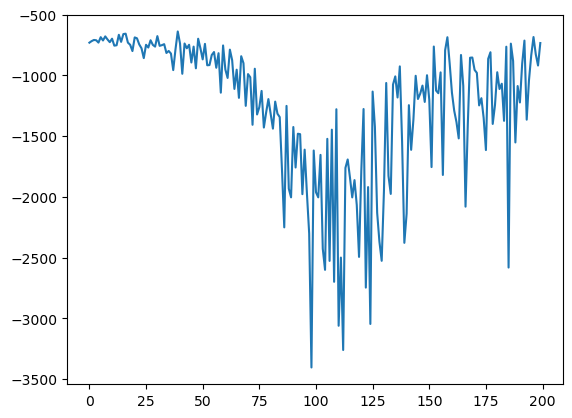

In [3]:
plt.plot(Episode_Reward)
plt.show()
